<font color='purple'><b><center> ~ Proyecto Segundo Sprint ~</center></b></font> 
<font color='purple'><i><center> ~ Modelos avanzados e ingenieria de features ~</center></i></font> 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Usuario/Downloads/DS_Proyecto_01_Datos_Properati.csv')

<font color='purple'><b>~ Elección de datos ~</b></font>

Los datos que se utilizarán para predecir el precio de la propiedad son la cantidad de habitaciones, baños y superficie total. El resto de datos se descartan ya que los datos elegidos dan la mayor cantidad de informacón sobre el inmueble y su posible precio.



<font color='purple'><b>~ Análisis exploratorio de datos ~</b></font>

In [3]:
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [4]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [5]:
data.isna().sum()/data.shape[0]*100

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

In [6]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Las variables de baños, superficie total, superficie cubierta, latitud y longitud son las únicas en presentar datos nulos. Las variables de superficie son las que presentan la mayor cantidad de datos nulos.

<font color='purple'><b>~ Correlación ~</b></font>

Text(0.5, 1.0, 'Correlación')

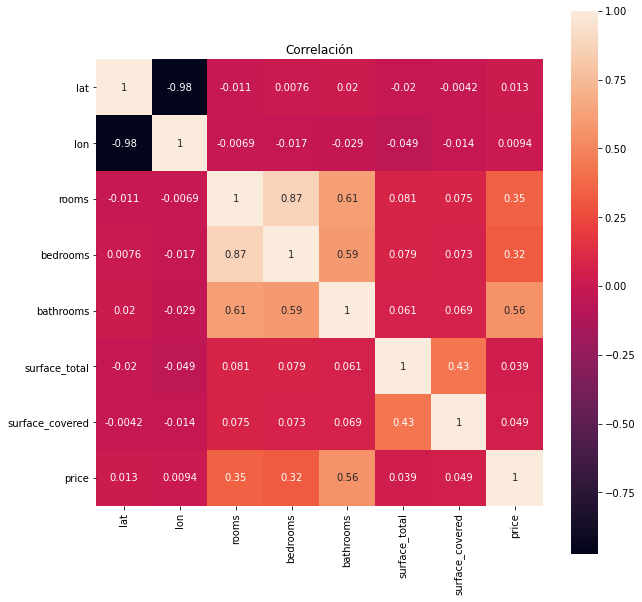

In [8]:
corr = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True, annot=True).set_title('Correlación')

Aquí se puede observar que las variables que están más fuertemente correlacionadas con el precio son baños, log_sc, log_st, habitaciones y dormitorios en orden descendente.

<font color='purple'><b>~ Gráficas de distribución ~</b></font>

Text(0.5, 1.0, 'Número de Habitaciones')

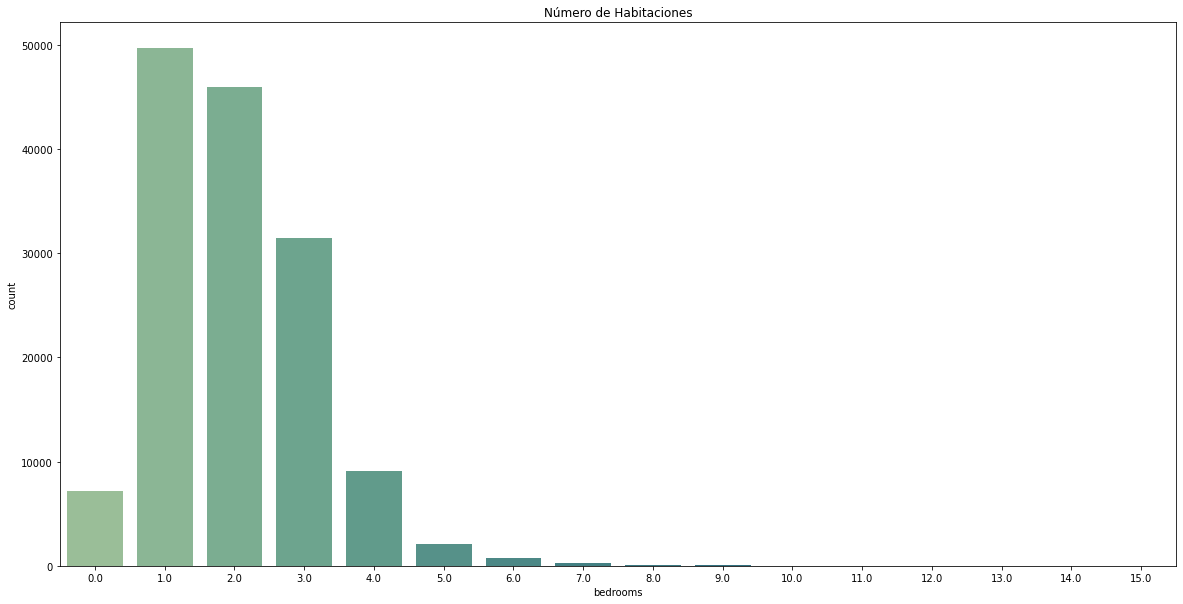

In [9]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x = "bedrooms", palette='crest').set_title('Número de Habitaciones')

Text(0.5, 1.0, 'Número de Baños')

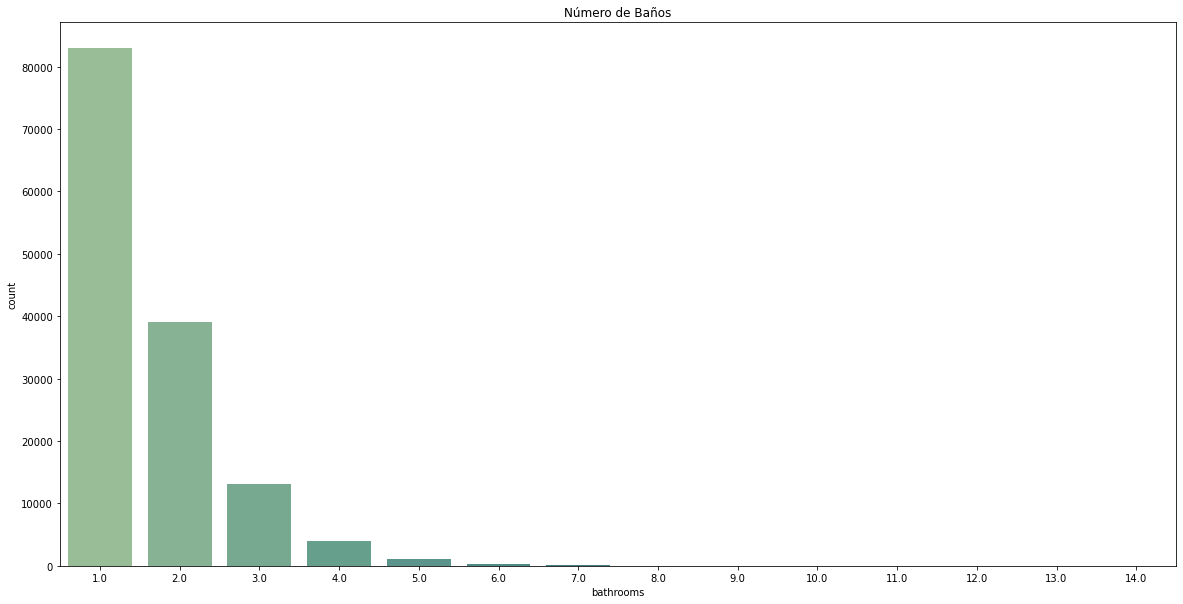

In [10]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x= "bathrooms", palette='crest').set_title('Número de Baños')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superficie Total')

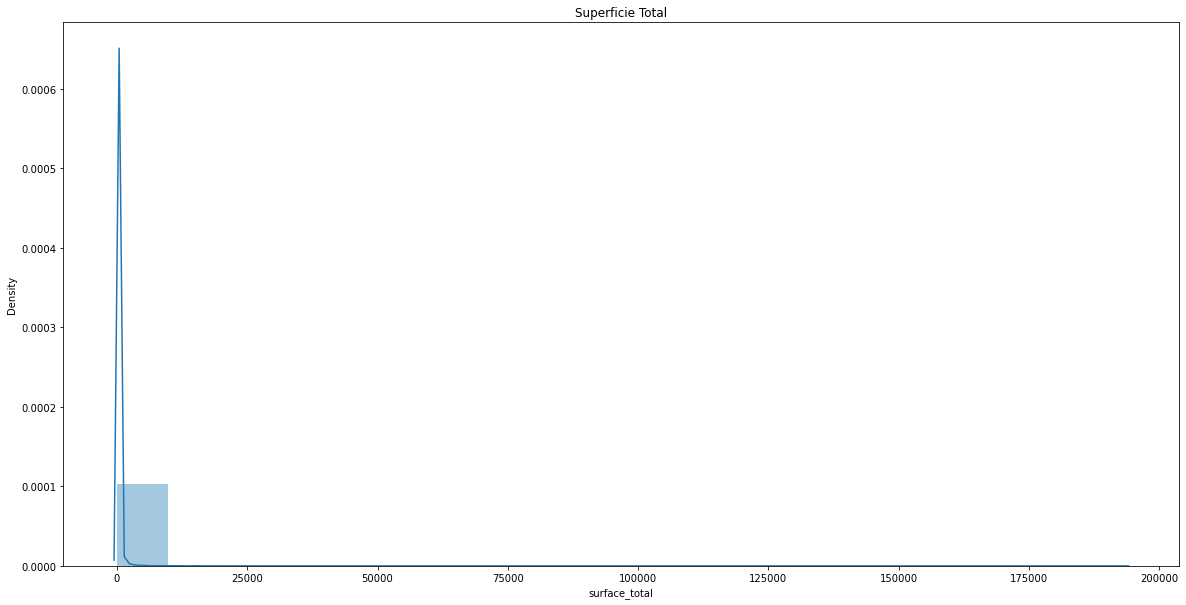

In [11]:
plt.figure(figsize = (20,10))
sns.distplot(data.surface_total, bins=20).set_title('Superficie Total')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superficie Cubierta')

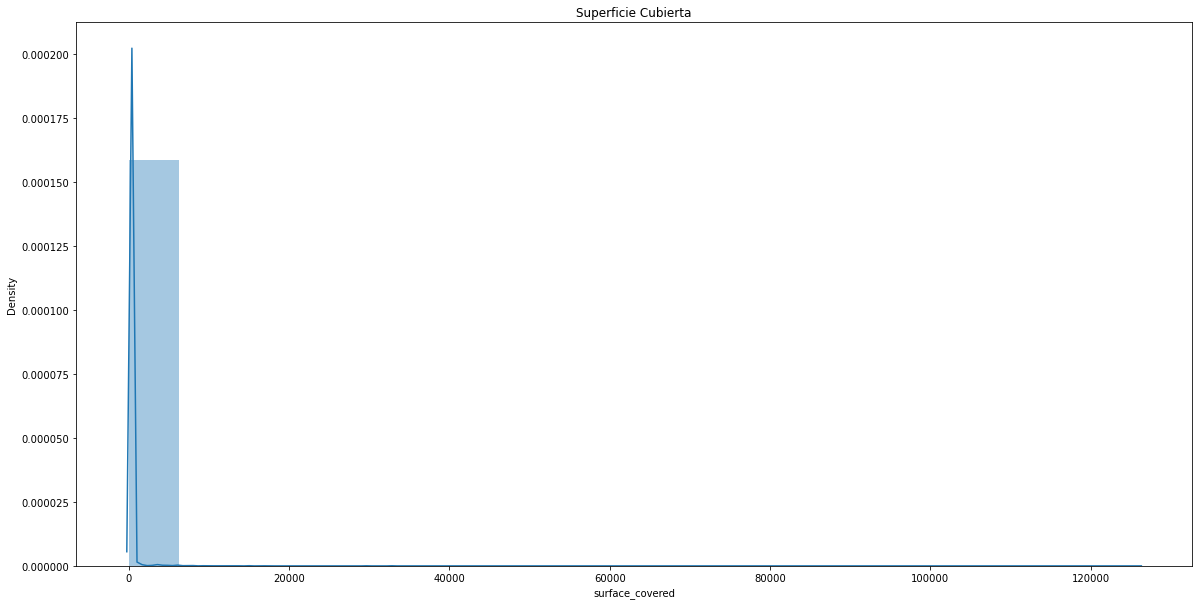

In [12]:
plt.figure(figsize = (20,10))
sns.distplot(data.surface_covered, bins=20).set_title('Superficie Cubierta')

Text(0.5, 1.0, 'Zona')

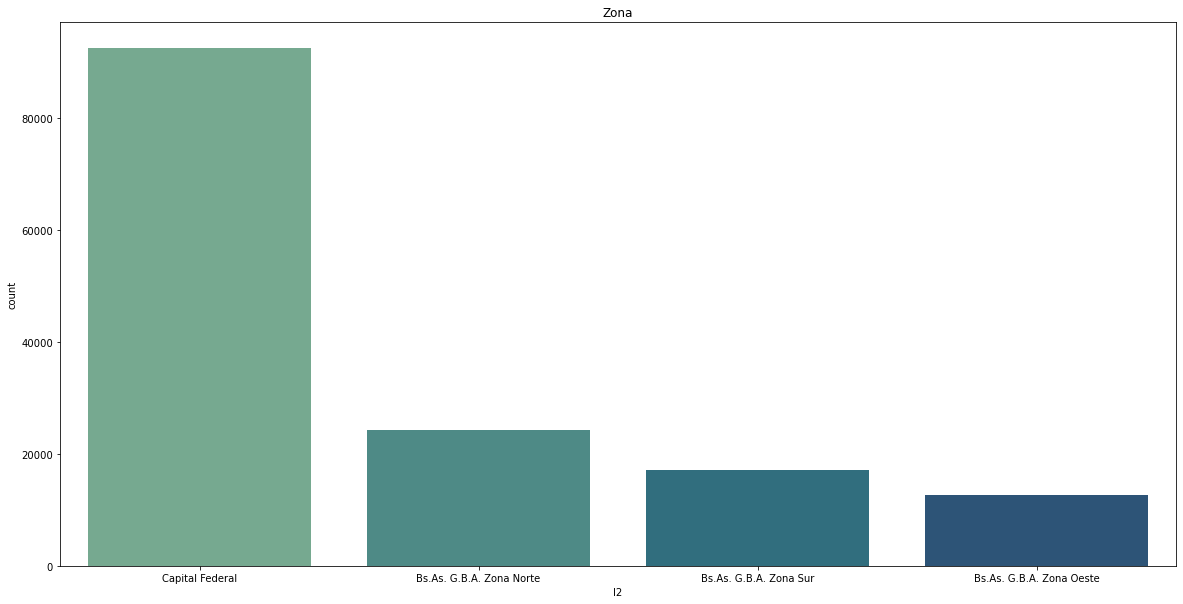

In [13]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x= "l2", order = data['l2'].value_counts().index, palette= 'crest').set_title('Zona')

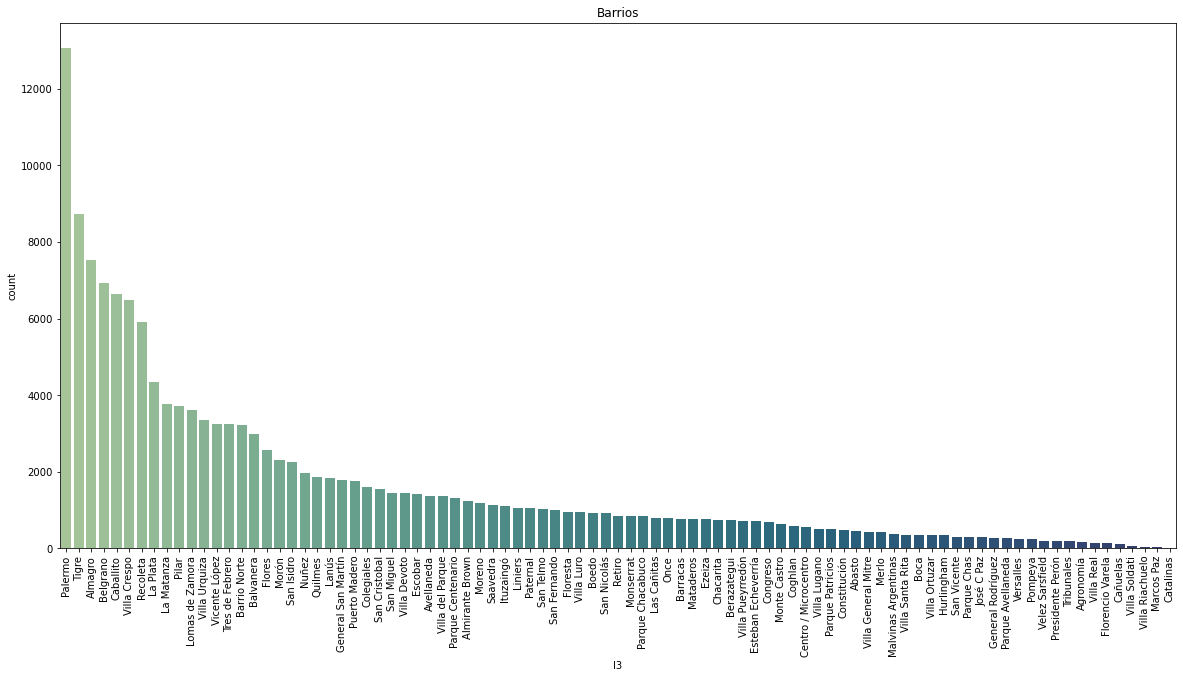

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x= "l3", order = data['l3'].value_counts().index, palette= 'crest').set_title('Barrios')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)

<font color='purple'><b>~ Presencia de datos atípicos ~</b></font>

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot ST')

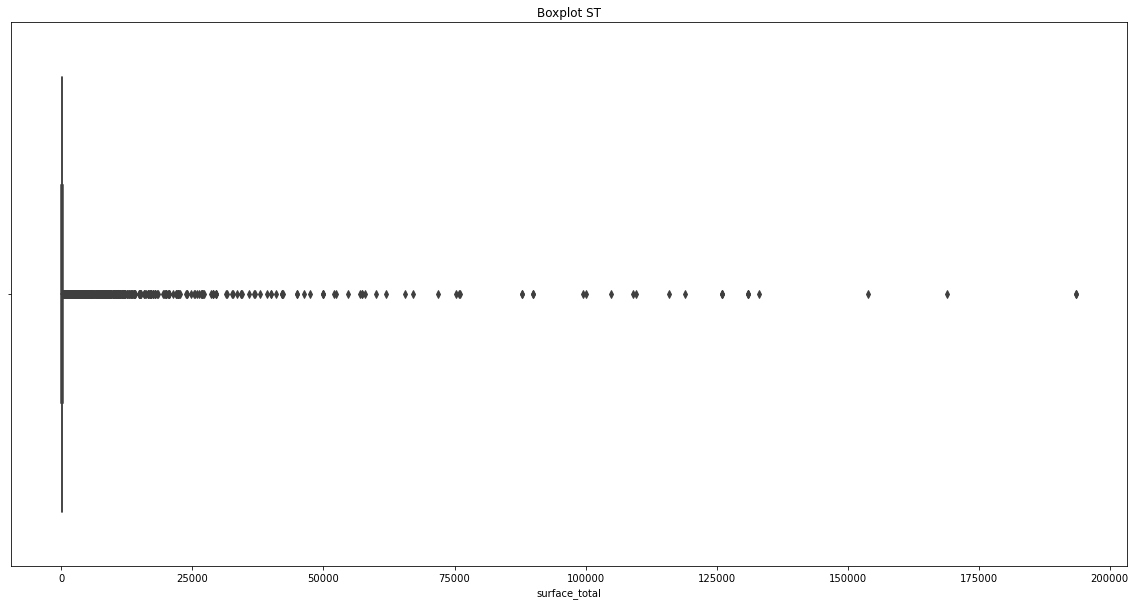

In [15]:
plt.figure(figsize = (20,10))
sns.boxplot(data.surface_total).set_title('Boxplot ST')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot SC')

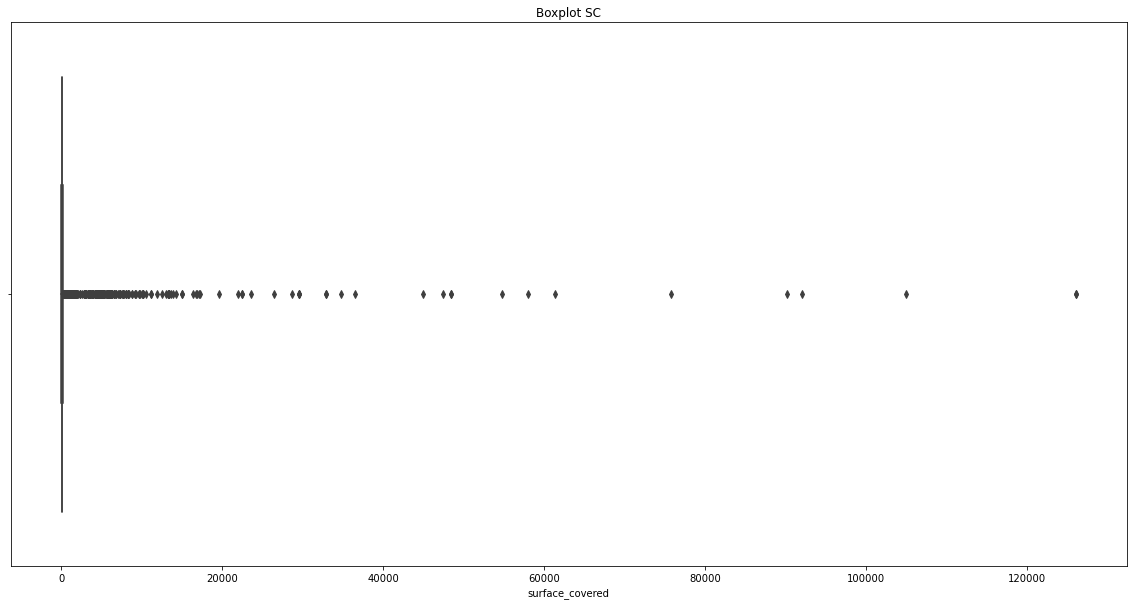

In [16]:
plt.figure(figsize = (20,10))
sns.boxplot(data.surface_covered).set_title('Boxplot SC')

Se puede observar la presencia de outliers en las variables `surface_total` y `surface_covered` además de una alta dispersión de los datos.

<font color='purple'><center><b>~ Pre-procesamiento de datos ~</b></center></font>

Para realizar los modelos de regresión se realizará un filtrado de datos de tal forma que se evaluen las propiedades con valores menores a los 4000000 dolares, las propiedades de tipo PH, departamento y casa y aquellas cuya superficie este entre los 15 y 1000 m2. También se hará imputación de los valores nulos de la variable `bathrooms` utilizando su media.

In [29]:
df2 = data[data['surface_total'] > data['surface_covered']]
df2 = df2[(df2['l2'] == "Capital Federal") & (df2.property_type.isin(['Departamento','Casa','PH']))] 

In [30]:
df2

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,USD,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,2019-07-31,2020-01-17,2019-07-31,-34.581308,-58.431236,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,USD,Torre Mirabilia - 4 amb - Piso Alto 106m2,Living comedor con acceso a Balcón aterrazadoM...,Departamento,Venta
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta


Se realiza la imputación de los datos nulos de la variable `bathrooms` utilizando la media.

In [31]:
df2['bathrooms'].fillna(df2['bathrooms'].mean(), inplace = True)

In [32]:
df2.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                2903
lon                2903
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [33]:
df2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,53755.000000,53755.000000,56658.000000,56658.000000,56658.000000,56658.000000,56658.000000,5.665800e+04
mean,-34.597773,-58.438632,3.030075,2.021797,1.596604,115.673303,86.032352,2.688902e+05
std,0.024174,0.035522,1.262296,1.014918,0.859131,763.499828,178.108930,2.952004e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,16.000000,1.000000,6.000000e+03
25%,-34.612873,-58.461851,2.000000,1.000000,1.000000,53.000000,46.000000,1.370000e+05
50%,-34.598170,-58.436204,3.000000,2.000000,1.000000,75.000000,64.000000,1.900000e+05
75%,-34.581758,-58.414225,4.000000,3.000000,2.000000,117.000000,95.000000,2.900000e+05
max,-34.535909,-58.353930,26.000000,15.000000,12.000000,126062.000000,13857.000000,6.500000e+06


<font color='purple'><b>Modelo Benchmark</b></font>

In [34]:
X = df2[['surface_total', 'bedrooms', 'bathrooms']]
y= df2.price

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39660, 3) (39660,) (16998, 3) (16998,)


In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [37]:
#Arbol de decisión
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 127014.50646651903
Raíz del error cuadrático medio en Test: 173114.38247459542


<font color='purple'><b>Transformaciones Segundo Modelo</b></font>

Se crearán dummies de los barrios para este modelo.

In [41]:
X2 = df2[['surface_total', 'bedrooms', 'bathrooms','l3']]
y2= df2.price

In [42]:
l3_array= X2.l3.to_numpy().reshape(-1,1)
l3_array

array([['Boedo'],
       ['Palermo'],
       ['Parque Patricios'],
       ...,
       ['Palermo'],
       ['Palermo'],
       ['Palermo']], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
l3code = enc.fit_transform(l3_array)

In [44]:
enc.categories_

[array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
        'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
        'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
        'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
        'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
        'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
        'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
        'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
        'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
        'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
        'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
        'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
        'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
        'Villa Soldati', 'Villa Urquiza', 'Villa del Parque'], dtype=object)]

In [45]:
l3code.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
l3df = pd.DataFrame(l3code.toarray(), columns=enc.categories_)
l3df

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
l3df = pd.DataFrame(l3code.toarray(), columns=enc.categories_)
l3df

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_dum = df2.join(l3df)
df_dum

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,"(Villa Lugano,)","(Villa Luro,)","(Villa Ortuzar,)","(Villa Pueyrredón,)","(Villa Real,)","(Villa Riachuelo,)","(Villa Santa Rita,)","(Villa Soldati,)","(Villa Urquiza,)","(Villa del Parque,)"
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,2019-07-31,2020-01-17,2019-07-31,-34.581308,-58.431236,Argentina,Capital Federal,Palermo,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_dum.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,"(Villa Lugano,)","(Villa Luro,)","(Villa Ortuzar,)","(Villa Pueyrredón,)","(Villa Real,)","(Villa Riachuelo,)","(Villa Santa Rita,)","(Villa Soldati,)","(Villa Urquiza,)","(Villa del Parque,)"
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X3 = df_dum[['surface_total', 'bedrooms', 'bathrooms']]
y3 = df_dum.price

Una vez creadas las dummies, se realizará reducción de dimensiones con PCA para simplificar el modelo.

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_nuevo = pca.fit_transform(X3) 

In [52]:
pca.components_

array([[ 9.99999991e-01,  1.05291130e-04,  7.73129967e-05],
       [ 1.30607492e-04, -7.95582294e-01, -6.05845522e-01],
       [ 2.28130818e-06, -6.05845527e-01,  7.95582301e-01]])

Después de realizadas las tranformaciones, se vuelve a realizar el modelo de árbol de decisones.

In [65]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [66]:
regresor2 = DecisionTreeRegressor(max_depth=10)
regresor2.fit(X2_train,y2_train)

DecisionTreeRegressor(max_depth=10)

In [69]:
y2_train_pred = regresor2.predict(X2_train)
y2_test_pred = regresor2.predict(X2_test)

In [70]:
#DecisionTree con reduccion de dimensiones
print(mean_squared_error(y2_train,y2_train_pred))
print(mean_squared_error(y2_test,y2_test_pred))

17922254227.996075
32645011589.807392


In [71]:
regresor2.feature_importances_

array([0.60892508, 0.06934402, 0.3217309 ])

Para evaluar los resultados del modelo se hace uso de RMSE para elegir el modelo que presente los errores más bajos entre los modelos utlizados. Ya que los errores están afectados por el efecto de los valores atípicos de superficie, esto no busca mostrar los errores minimos posibles que harían a este modelo más eficiente.

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 319354.5757215921
Raíz del error cuadrático medio en Test: 336915.21772367164


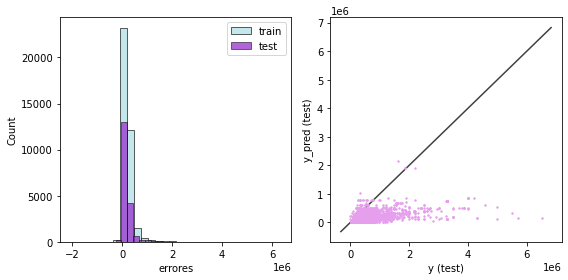

Modelo: Árbol de Decisión 2
Raíz del error cuadrático medio en Train: 133874.02372378323
Raíz del error cuadrático medio en Test: 180679.3059257407


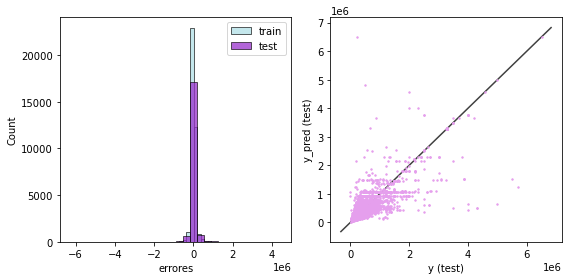

In [72]:
from sklearn.metrics import mean_squared_error
modelos = ['Árbol de Decisión', 'Árbol de Decisión 2']

for i, model in enumerate([tree_regressor, regresor2]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
      
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')    
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(np.array(y_train) - y_train_pred, bins = 30, label = 'train', color='powderblue')
    sns.histplot(np.array(y_test) - y_test_pred, bins = 30, label = 'test', color = 'darkorchid')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2, c='#e59fed')    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<font color='purple'><b>Conclusión</b></font>

De acuerdo a los resultados obtenidos, el modelo de árbol de decisión mejora al aplicarse análisis de componentes principales. 

<font color='purple'><b>Problemas a solucionar</b></font>

Ambos modelos muestran errores menores en `test` que en `train` pero aún existe sobreajuste aunque este mejora en el segundo modelo. 